# Исследование надёжности заёмщиков

Цель - исследовать влияние параметров кредиторов на возврат кредита в срок. 

Задачи: 
- преобработать данные: найти и заполнить пропущенные значения, удалить дубликаты, заменить тип данных, выделить леммы и категоризировать данные. 
- проверить  зависимость возврата кредита от семейного положения, наличия детей, возраста, уровнем дохода.

# Знакомство с данными

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Согласно общей информации в таблице, отсутствуют некоторые данные по трудовому стажу и доходу. Возможно, это связано с отсутствием документов, подтверждающих доходы, например на момент составления базы не было выписок из трудовых книг для этих клиентов. Необходимо заполнить пропуски в колонке дохода, а стаж пока не будем принимать в рассчет. 

# Предобработка данных

## Обработка пропусков

In [103]:
df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [104]:
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

In [105]:
employee = df.loc[df['income_type'] == 'сотрудник'] # выбираем строки только для типа доходов "сотрудники"
employee_median = employee['total_income'].median() # считаем медиану по доходу в этой категории
employee_median # смотрим результат, который подставим в пропущенных ячейках дохода для этой группы
df.loc[(df['income_type'] == 'сотрудник') & (df['total_income'].isna()), 'total_income'] = 142594.39684740017
df.loc[(df['income_type'] == 'сотрудник')].isna().mean() # проверяем, что пропусков в этой категории больше нет

children            0.000000
days_employed       0.099379
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.000000
purpose             0.000000
dtype: float64

In [106]:
companion = df.loc[df['income_type'] == 'компаньон'] # повторяем то же самое для других типов дохода
companion_median = companion['total_income'].median()
companion_median #172357.95096577113
df.loc[(df['income_type'] == 'компаньон') & (df['total_income'].isna()), 'total_income'] = 172357.95096577113
df.loc[(df['income_type'] == 'компаньон')].isna().mean()

children            0.000000
days_employed       0.099902
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.000000
purpose             0.000000
dtype: float64

In [107]:
retired = df.loc[df['income_type'] == 'пенсионер'] 
retired_median = retired['total_income'].median()
retired_median 
df.loc[(df['income_type'] == 'пенсионер') & (df['total_income'].isna()), 'total_income'] = 118514.48641164352
df.loc[(df['income_type'] == 'пенсионер')].isna().mean()

children            0.000000
days_employed       0.107106
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.000000
purpose             0.000000
dtype: float64

In [108]:
civil_servant = df.loc[df['income_type'] == 'госслужащий']
civil_servant_median = civil_servant['total_income'].median()
civil_servant_median
df.loc[(df['income_type'] == 'госслужащий') & (df['total_income'].isna()), 'total_income'] = 150447.9352830068
df.loc[(df['income_type'] == 'госслужащий')].isna().mean()

children            0.000000
days_employed       0.100754
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.000000
purpose             0.000000
dtype: float64

In [109]:
other_income_types = df.loc[df['income_type'].isin(['безработный','предприниматель','в декрете','студент'])]
other_income_types_median = other_income_types['total_income'].median()
other_income_types_median
df.loc[(df['income_type'].isin(['безработный','предприниматель','в декрете','студент'])) & (df['total_income'].isna()), 'total_income'] = 98201.62531401133
df.loc[(df['income_type'].isin(['безработный','предприниматель','в декрете','студент']))].isna().mean()

children            0.000000
days_employed       0.166667
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.000000
purpose             0.000000
dtype: float64

In [110]:
df.isna().mean() #проверяем, что для всей таблицы пропусков в колонке дохода больше нет

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.000000
purpose             0.000000
dtype: float64

Отсутствовала информация о доходах у 2174 клиентов в базе (значение NaN), это 10% клиентов. Посчитали медиану дохода для разных типов доходов и заменили пропуски медианными значениями. 

## Замена типа данных

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Тип данных адекватен содержанию. 

## Обработка дубликатов

In [112]:
df.duplicated().sum()

54

In [113]:
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [114]:
df['education'] = df['education'].str.lower()
df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Возможно, колонку с образованием заполняли вручную (не выбирали из списка), поэтому там те же самые значения написаны в разных регистрах. Нужно было привести значения к нижнему регистру в этом слобце. В таблице есть строки-дубликаты, но они выглядят не случайными, поэтому их удалять не надо. 

## Лемматизация

In [115]:
df['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

In [116]:
from pymystem3 import Mystem
m = Mystem()
lemmas = m.lemmatize(' '.join(df['purpose']))
lemmas
from collections import Counter
Counter(lemmas)

Counter({'покупка': 5912,
         ' ': 55201,
         'жилье': 4473,
         'приобретение': 462,
         'автомобиль': 4315,
         'дополнительный': 909,
         'образование': 4022,
         'сыграть': 774,
         'свадьба': 2348,
         'операция': 2610,
         'с': 2924,
         'на': 2233,
         'проведение': 777,
         'для': 1294,
         'семья': 641,
         'недвижимость': 6367,
         'коммерческий': 1315,
         'жилой': 1233,
         'строительство': 1881,
         'собственный': 635,
         'подержать': 858,
         'свой': 2235,
         'со': 630,
         'заниматься': 908,
         'сделка': 944,
         'получение': 1316,
         'высокий': 1375,
         'подержанный': 110,
         'профильный': 436,
         'сдача': 653,
         'ремонт': 612,
         '\n': 1})

Теперь у нас есть список лемматизированных слов из колонки целей, которые нужно распределить по категориям. Необходимо создать колонку с ключевыми словами, которые будут присваиваться на основе значений из колонки лемматизированных целей. 

## Категоризация данных

In [121]:
def purpose_lemmas(purpose):
    for query in purpose: 
        lemmas = ' '.join(m.lemmatize(purpose))
    return lemmas
df['purpose_lemmas']= df['purpose'].apply(purpose_lemmas)
df['purpose_lemmas'].value_counts()

автомобиль \n                                    973
свадьба \n                                       797
на   проведение   свадьба \n                     777
сыграть   свадьба \n                             774
операция   с   недвижимость \n                   676
покупка   коммерческий   недвижимость \n         664
операция   с   жилье \n                          653
покупка   жилье   для   сдача \n                 653
операция   с   коммерческий   недвижимость \n    651
покупка   жилье \n                               647
жилье \n                                         647
покупка   жилье   для   семья \n                 641
строительство   собственный   недвижимость \n    635
недвижимость \n                                  634
операция   со   свой   недвижимость \n           630
строительство   жилой   недвижимость \n          626
покупка   недвижимость \n                        624
строительство   недвижимость \n                  620
покупка   свой   жилье \n                     

In [125]:
def purpose_group(lemmas):
    """
        Возвращает группу целей по значению цели purpose, используя правила:
        - 'недвижимость' при леммах "жилье" и "недвижимость" в колонке purpose_lemmas 
        - 'автомобиль' при значении леммы в purpose_lemmas "автомобиль"
        - 'образование' если встречается лемма "образование"
        - 'свадьба' если встречается лемма "свадьба"
        - 'другое' для всех остальных значений
        """
    for word in lemmas:
        if 'жилье' in lemmas or 'недвижимость' in lemmas:
            return 'недвижимость'
        if 'образование' in lemmas: 
            return 'образование'
        if 'автомобиль' in lemmas: 
            return 'автомобиль'
        if 'свадьба' in lemmas: 
            return 'свадьба'
        return 'другое'
#purpose_group('заниматься')
df['purpose_group'] = df['purpose_lemmas'].apply(purpose_group)
df['purpose_group'].value_counts()

недвижимость    10840
автомобиль       4315
образование      4022
свадьба          2348
Name: purpose_group, dtype: int64

In [126]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemmas,purpose_group
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,покупка жилье \n,недвижимость
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,приобретение автомобиль \n,автомобиль
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,покупка жилье \n,недвижимость
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,дополнительный образование \n,образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,сыграть свадьба \n,свадьба
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,покупка жилье \n,недвижимость
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,операция с жилье \n,недвижимость
7,0,-152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,образование \n,образование
8,2,-6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,на проведение свадьба \n,свадьба
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,покупка жилье для семья \n,недвижимость


В целях кредита можно выделить 4 категории целей: недвижимость, автомобиль, образование, свадьба. Самый популярный запрос - покупка недвижимости. 

# Зависимость возврата кредита от параметров кредитора

## Зависимость между наличием детей и возвратом кредита в срок

In [128]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [142]:
df_children = df[(df['children'] != -1)&(df['children'] != 20)] #уберем странные значения -1 и 20. 
df_children['children'].value_counts()

0    14196
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

In [143]:
df_children['debt'].value_counts()

0    19716
1     1733
Name: debt, dtype: int64

In [152]:
def children_depend(row):
    children = row['children']
    debt = row['debt']
    for query in row: 
        if children == 0:
            if debt == 1: 
                return 'Нет детей, долг'
        if children == 0:
            if debt == 0:
                return 'Нет детей, нет долга'
        if children != 0:
            if debt == 1:
                return 'Дети, долг'
        return 'Дети, нет долга'
df_children['children_depend']= df_children.apply(children_depend, axis=1)
df_children['children_depend'].value_counts()

Нет детей, нет долга    13132
Дети, нет долга          6584
Нет детей, долг          1064
Дети, долг                669
Name: children_depend, dtype: int64

In [184]:
# распредение деолжников по клиентам с разным количеством детей 
debt_children_table = df_children.groupby(['children'])['debt'].agg(['count','mean'])
debt_children_table

,count,mean
children,,
0,14196,0.074951
1,4818,0.092154
2,2055,0.094404
3,330,0.081818
4,41,0.097561
5,9,0.000000


In [182]:
# посчитаем процент должников среди клиентов с детьми
children_debt_count = df_children[df_children['children_depend']=='Дети, долг']['children_depend'].count()
children_no_debt_count = df_children[df_children['children_depend']=='Дети, нет долга']['children_depend'].count()
children_no_debt_count
probability_debt_children = children_debt_count / children_no_debt_count
probability_debt_children


0.10160996354799513

In [183]:
# посчитаем процент должников среди клиентов без детей
no_children_debt_count = df_children[df_children['children_depend']=='Нет детей, долг']['children_depend'].count()
no_children_no_debt_count = df_children[df_children['children_depend']=='Нет детей, нет долга']['children_depend'].count()
probability_debt_no_children = no_children_debt_count / no_children_no_debt_count
probability_debt_no_children

0.08102345415778252

In [214]:
data = [['С детьми', '10%'],
       ['Без детей', '8%']]
columns = ['Тип клиентов','Процент невернувших долг']
debt_children_result = pd.DataFrame(data=data,columns=columns)
debt_children_result

,Тип клиентов,Процент невернувших долг
0,С детьми,10%
1,Без детей,8%


Мы посмотрели результаты задолжности в зависимости от количесива детей, потом выделили 4 категории клиентов: с детьми и без, с долгами и без, чтобы посмотреть соотношение должников к тем, кто кредит вернул вовремя, и понять, вляет ли наличие детей на погашение кредита. 
10% клиентов с детьми и 8% бездетных клиентов не возваращают долг. Это значит, что риски для клиентов с детьми выше на 2%. 

## Зависимость между семейным положением и возвратом кредита в срок

In [174]:
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [180]:
debt_status_table = df.groupby(['family_status'])['debt'].agg(['count','mean'])
debt_status_table

,count,mean
family_status,,
Не женат / не замужем,2813,0.097405
в разводе,1195,0.071130
вдовец / вдова,960,0.065625
гражданский брак,4177,0.092890
женат / замужем,12380,0.075202


In [179]:
debt_status_table.sort_values(by='mean', ascending = False)

,count,mean
family_status,,
Не женат / не замужем,2813,0.097405
гражданский брак,4177,0.092890
женат / замужем,12380,0.075202
в разводе,1195,0.071130
вдовец / вдова,960,0.065625


Более надежными клиентами являются те, кто сейчас или был официально в браке. Похоже, наличие брака (даже в прошлом)  коррелирует с большей ответственностью.  

## Зависимость между уровнем дохода и возвратом кредита в срок

In [189]:
df['total_income'].min()

20667.26379327158

In [190]:
df['total_income'].max()

2265604.028722744

In [191]:
df['total_income'].median()

142594.39684740017

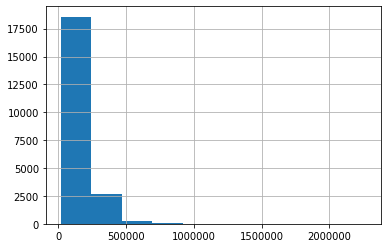

In [193]:
df['total_income'].hist()

In [203]:
df['total_income2'] = pd.qcut(df['total_income'],3)
df['total_income2'].value_counts()  
#len(df) #21525

(119234.981, 172357.951]     7334
(20667.263, 119234.981]      7175
(172357.951, 2265604.029]    7016
Name: total_income2, dtype: int64

In [204]:
df.groupby(['total_income2'])['debt'].agg(['count','mean'])

,count,mean
total_income2,,
"(20667.263, 119234.981]",7175,0.080976
"(119234.981, 172357.951]",7334,0.086174
"(172357.951, 2265604.029]",7016,0.075257


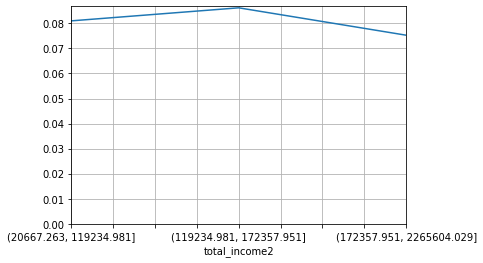

In [206]:
df.groupby(['total_income2'])['debt'].mean().plot(grid=True,ylim=0)

Мы поделили всех клиентов на три равные группы по количеству дохода и посмотрели, каков процент должников в каждой из этих групп. Клиенты со средним доходом имеют больше долгов, чем клиенты с более скромным или наоборот более высоким доходом. Меньше всего рисков у группы с высоким доходом. Можем предположить, что клиенты с небольшим доходом более строго ведут семейный бюджет и берут не очень большие кредиты, поэтому и аккуратнее возвращают. Самые состоятельные лучше других оплачивают кредиты, потому что у них может быть буффер, откуда можно взять и погасить кредит. 

## Зависимость цели кредита на его возврат в срок

In [207]:
df.groupby('purpose_group')['debt'].agg(['count','mean'])

,count,mean
purpose_group,,
автомобиль,4315,0.093395
недвижимость,10840,0.072140
образование,4022,0.091994
свадьба,2348,0.079216


In [209]:
debt_status_table = df.groupby('purpose_group')['debt'].agg(['count','mean'])
debt_status_table.sort_values(by='mean', ascending = False)

,count,mean
purpose_group,,
автомобиль,4315,0.093395
образование,4022,0.091994
свадьба,2348,0.079216
недвижимость,10840,0.072140


Хуже всего возвращают долг за кредит на машину и образование. Риски по возврату кредита на недвижимость ниже других категорий. 

# Общий вывод

В то время как люди в браке и даже после него чаще отдают кредит в срок, наличие детей может увеличить риск невозврата. Люди с более высоким доходом отдают кредиты в срок чаще других. Кредиты на машину и образование погашаются хуже, чем на свадьбу и недвижимость. 